# Quantum Ensemble as Simple Averaging -  Experiments

This notebook reproduces the results in Section 4.3 of the paper *Quantum Ensemble for Classification* where is is shown that the Quantum Ensemble algorithm is able to compute the expectation value of multiple trajectories in superposition with just one implementation of the quantum cosine classifier. 

For more details about the theoretical background see **Quantum Ensemble - Independent Trajectories.ipynb**


In [1]:
# Import packages and functions
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

Create the simple dataset reported in Table 1 and execute the (classical) cosine classifier.

In [2]:
# Load data without normalisation
X_data, Y_data, x_test = load_data_custom(normalize = False)

# Create table as shown in the paper (Table 1)
data = pd.DataFrame(X_data, columns = [r'$X_1$', r'$X_2$'])

# Extract the value of the target variable as integer
y = [c[1] for c in Y_data]

# Compute the cosine distance between the training points and the test point
dist = [cosine_similarity([x], [x_test])[0][0] for x in X_data]

# Compute the value of the cosine distance classifier
# for the four training points from the test point
p = [cosine_classifier(x, x_test)[0][0] for x in X_data]

# Extract the probabilities for the test point to be classified in class 
# 1 according to the (classical) cosine classifies Equation (16)
probs = []
for i,j in zip(y,p):
    if i == 0:
        probs.append(1-j)
    else:
        probs.append(j)

# Create dataset as in paper (Table 1)
probs = np.array(probs)

# Rename columns
data[r'$y$'] = np.array(y)
data[r'$d($$\cdot$$, $ $\tilde{x})$'] = np.round(dist,2)
data[r'$P($$\tilde{y}$$=1$$|b$ $)$'] = probs

# Rename rows
data.index = [r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$',]

#Visualize dataset
data

,$X_1$,$X_2$,$y$,"$d($$\cdot$$, $ $\tilde{x})$",$P($$\tilde{y}$$=1$$|b$ $)$
$x_1$,1,3,0,0.89,0.10
$x_2$,-2,2,1,0.00,0.50
$x_3$,3,0,0,0.71,0.25
$x_4$,3,1,1,0.89,0.90


### Implementation of the quantum cosine classifier

In [3]:
# Load normalised data
X_data, Y_data, x_test = load_data_custom()

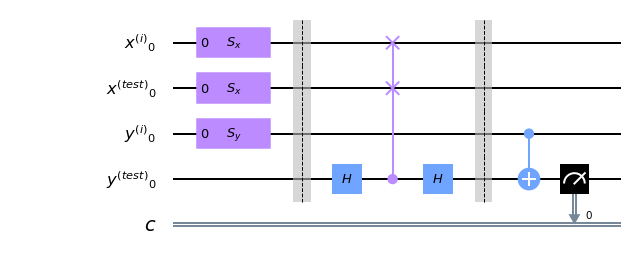

In [4]:
#Visualisation of quantum cosine classifier
quantum_cosine = quantum_cosine_classifier(X_data[0], x_test, Y_data[0] )
quantum_cosine.draw(output='mpl', scale=.7)

For each training point in *data* the quantum cosine classifier is executed to compute the prediction of the target variable for the test point $\tilde{x}$. Thus, given the measurements of the quantum circuts, the target probabilities are retrieved using the function *retrieve_proba*.

In [5]:
qc1 = quantum_cosine_classifier(X_data[0], x_test, Y_data[0] )
r1 = exec_simulator(qc1)
r1 = retrieve_proba(r1) 

qc2 = quantum_cosine_classifier(X_data[1], x_test, Y_data[1])
r2 = exec_simulator(qc2)
r2 = retrieve_proba(r2)

qc3 = quantum_cosine_classifier(X_data[2], x_test, Y_data[2])
r3 = exec_simulator(qc3)
r3 = retrieve_proba(r3)

qc4 = quantum_cosine_classifier(X_data[3], x_test, Y_data[3])
r4 = exec_simulator(qc4)
r4 = retrieve_proba(r4)

out = [r1, r2, r3, r4]

We compute the average of predictions provided by the four quantum cosine classifiers that corresponds to the classical ensemble prediction, using simple averaging as aggregation strategy.

In [6]:
p0 = [p[0] for p in out]
p1 = [p[1] for p in out]
r_avg = [np.mean(p0), np.mean(p1)]
# print(np.mean(p0), np.mean(p1))

### Quantum Ensemble of four cosine classifiers

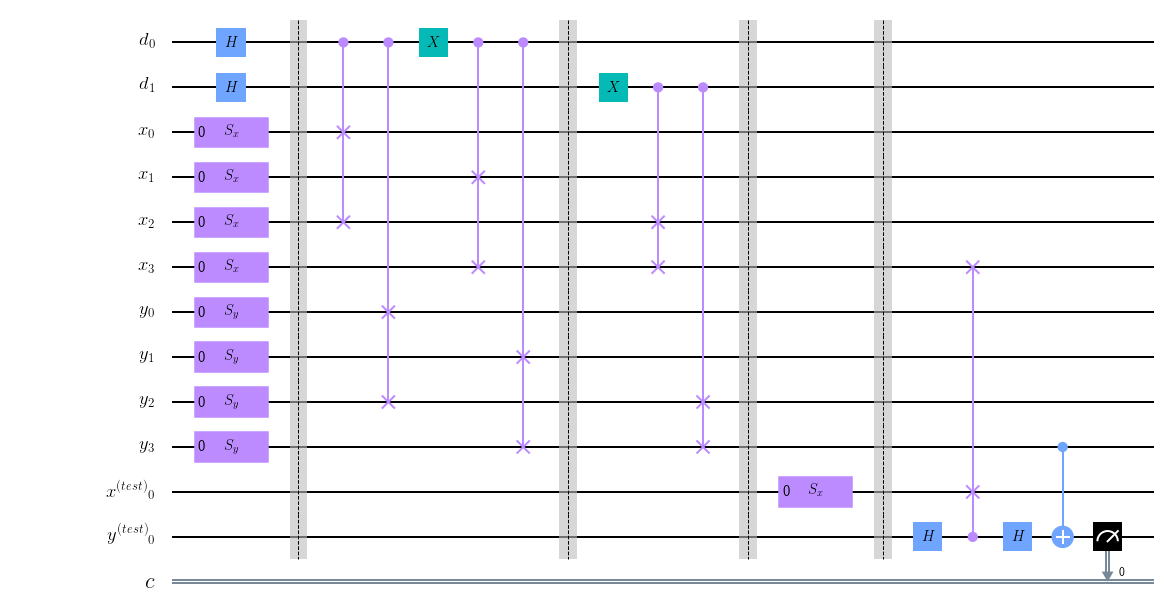

In [15]:
qc = ensemble_fixed_U(X_data, Y_data, x_test)
qc.draw(output='mpl', scale=.6, #filename='output/ensemble_circuit.png', 
        style={'fontsize':15, 'dpi':200})

In [8]:
r = exec_simulator(qc, n_shots=8192)
r_ens = retrieve_proba(r)
print(r_ens)

[0.553955078125, 0.446044921875]


In [9]:
# collect the results
output_simulator = [r1, r2, r3, r4, r_avg, r_ens]

data_pred = pd.DataFrame(output_simulator, 
                         columns=['p0', 'p1'], index=['qc1','qc2','qc3','qc4','AVG','Ensemble'])
data_pred
# data_pred.to_csv('output/sim_results.csv', index=False)

,p0,p1
qc1,0.900269,0.099731
qc2,0.504395,0.495605
qc3,0.751709,0.248291
qc4,0.093994,0.906006
AVG,0.562592,0.437408
Ensemble,0.553955,0.446045


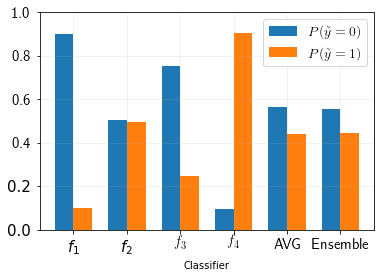

In [10]:
plot_cls(output_simulator, title= '', file='SIM_prediction')

The probability provided by the quantum cosine classifiers ($f_1$, $f_2$, $f_3$, $f_4$)  are pretty much the same to the classical cosine classifier (*data*). Furthermore, the average of the four classifiers is almost the same to the quantum ensemble prediction where it is required only one execution of the cosine classifier.

## Multiple Experiments

In order to show that the result of quantum ensemble holds regardless of the data reported in *Table 1*, the same experiment is performed on $20$ randomly generated datasets, and the average of the quantum cosine classifiers and the quantum ensemble prediction are compared

In [14]:
seed = 543

n_shots = 8192
N_runs = 20
y_labels =[[0,1], [1,0]]

In [12]:
p1_avg = []
p1_ens = []

np.random.seed(seed)
for run in np.arange(N_runs):
    # print(run)
    x1 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x2 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x3 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x4 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    
    y1 = y_labels[np.random.randint(0, 2)]
    y2 = y_labels[np.random.randint(0, 2)]
    y3 = y_labels[np.random.randint(0, 2)]
    y4 = y_labels[np.random.randint(0, 2)]
    
    Y_data = [y1, y2, y3, y4]  
    X_data = [x1, x2, x3, x4]
    
    x_test = [np.random.randint(1, 9), np.random.randint(1, 9)]

    X_data, Y_data, x_test = load_data_custom(X_data, Y_data, x_test = x_test)

    qc1 = quantum_cosine_classifier(X_data[0], x_test, Y_data[0] )
    r1 = exec_simulator(qc1)
    r1 = retrieve_proba(r1)

    qc2 = quantum_cosine_classifier(X_data[1], x_test, Y_data[1])
    r2 = exec_simulator(qc2)
    r2 = retrieve_proba(r2)

    qc3 = quantum_cosine_classifier(X_data[2], x_test, Y_data[2])
    r3 = exec_simulator(qc3)
    r3 = retrieve_proba(r3)

    qc4 = quantum_cosine_classifier(X_data[3], x_test, Y_data[3])
    r4 = exec_simulator(qc4)
    r4 = retrieve_proba(r4)
     
    out = [r1, r2, r3, r4]

    p0 = [p[0] for p in out]
    p1 = [p[1] for p in out]
    
    r_avg = [np.mean(p0), np.mean(p1)]
    # print('AVG:', r_avg)

    
    qc = ensemble_fixed_U(X_data, Y_data, x_test)
    qc = transpile(qc, basis_gates = ['u1', 'u2', 'u3', 'cx'], optimization_level=3)

    r = exec_simulator(qc, n_shots=n_shots)
    r_ens = retrieve_proba(r)
    # print('Ensemble', r_ens)

    out = [r1, r2, r3, r4, r_avg, r_ens]
    
    p1_avg.append(r_avg[1])
    p1_ens.append(r_ens[1])

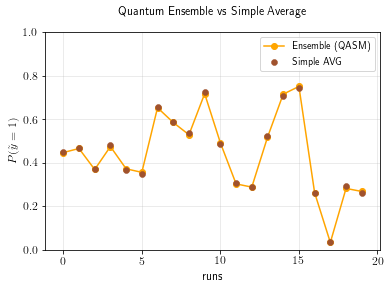

In [13]:
avg_vs_ensemble(p1_avg, p1_ens)

##### In order to perform the same computation on real device it is necessary to load an IBMQ account and to use the function $\text{run_real_device}$ instead of $\text{exec_simulator}$

In [ ]:
# Execution on real device
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend_16 = provider.get_backend('ibmq_16_melbourne')
backend_5 = provider.get_backend('ibmq_rome')

def run_real_device(qc, backend, shots=8192):
    job = execute(qc, backend, shots=shots)
    results = job.result()
    r = results.get_counts(qc)
    return r